# Pryngles Tutorials: Developers
## Part 3 - Module Spangler

This notebook illustrate in detail the interface of the `Pryngles` package. It is especially intended for developers.

Authors:
- Jorge I. Zuluaga, [jorge.zuluaga@udea.edu.co](mailto:jorge.zuluaga@udea.edu.co)

Warnings:
- This file was prepared using version 0.7.3.1 of `Pryngles`.
- Matplotlib commands run in version 3.5.2.

<center><font color='red' size='8'><i>This tutorial is under construction.</i></font></center>

## Preparation

Before running this tutorial you need to install `Pryngles`:

In [1]:
#!python -m pip install -qU pryngles
#!pip show pryngles

If you are running this tutrial in `Google Colab` please run the following lines:

In [2]:
"""
import matplotlib.pyplot as plt
RESOLUTION = 150
%matplotlib inline
plt.rcParams['figure.dpi'] = RESOLUTION
# Sometimes you need to run twice this magic to be sure the backend is loaded
%matplotlib inline
#""";

## Import useful packages

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Although it is not a good practice to import everything of a package, for this tutorial and to avoid excesively large names we will import everything from Pryngles:

In [4]:
from pryngles import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Core modules

## Spangler (`spangler`)

This is one of the key modules of `Pryngles`.  Sampling the surface of a body (star, planet or ring) is just the beginning.  In order to compute all the effects for which `Pryngles` was designed we need to build a special object called a `Spangler`.

You may create the most simple `Spangler` using:

In [5]:
sg=Spangler()

The most important attribute of a `Spangler` is a DataFrame containing the positions and orientations of spangles:

In [6]:
print_df(sg.data)

,sphash,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cost_int,cos_int,d_int,z_cen_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cost_obs,cos_obs,d_obs,z_cen_obs,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cost_luz,cos_luz,d_luz,z_cen_luz,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
0,33745,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False


These are the columns in the spangler DataFrame:

In [7]:
sg.data.columns

Index(['sphash', 'spangle_type', 'geometry', 'scale', 'n_equ', 'alpha_equ',
       'w', 'q0', 'center_equ', 'x_equ', 'y_equ', 'z_equ', 'r_equ', 'q_equ',
       'f_equ', 'ns_equ', 'center_ecl', 'x_ecl', 'y_ecl', 'z_ecl', 'ns_ecl',
       'center_int', 'x_int', 'y_int', 'z_int', 'ns_int', 'rho_int', 'az_int',
       'cost_int', 'cos_int', 'd_int', 'z_cen_int', 'center_obs', 'x_obs',
       'y_obs', 'z_obs', 'ns_obs', 'rho_obs', 'az_obs', 'cost_obs', 'cos_obs',
       'd_obs', 'z_cen_obs', 'center_luz', 'x_luz', 'y_luz', 'z_luz', 'ns_luz',
       'rho_luz', 'az_luz', 'cost_luz', 'cos_luz', 'd_luz', 'z_cen_luz', 'asp',
       'dsp', 'albedo_gray_normal', 'tau_gray_optical', 'unset', 'hidden',
       'source', 'visible', 'intersect', 'shadow', 'indirect', 'emit', 'above',
       'illuminated', 'transmit', 'transit', 'occult'],
      dtype='object')

In order to know the meaning of the columns see:

In [8]:
print(SPANGLER_COLUMNS_DOC)


SPANGLER_COLUMNS=odict({
    "sphash":"",

    #Type of spangle
    "spangle_type":SPANGLE_SOLID_ROCK, #For a list of spangle types see the constants module.
    "geometry":SAMPLER_GEOMETRY_CIRCLE, #Geometry of the spangle (see Sampler module constants)

    #Lengh-scale
    "scale":1, #The length scale of the body, eg. for a ring this is the outer radius

    #Body parameters
    "n_equ":[0,0,1], #Direction of the equator of the body with respect
    "alpha_equ":0, #Zero meridian of equatorial system
    "w":0, #Rotational angular velocity [rad/ut]
    "q0":0, #Initial time [rad], Longitude (azimutal angle) are calculated as: q = q0 + w (t - t0)

    #Coordinates of the spangle (cartesian and spherical) in the body-centric system
    "center_equ":[0,0,0],#Center of the body with respect to barycenter
    "x_equ":1,"y_equ":0,"z_equ":0, #Cartesian coordinates
    "r_equ":1,"q_equ":0,"f_equ":0, #Spherical coordinates: q: longitude, f: latitude
    "ns_equ":[0,0,1], #Unitary vector norma

It is important to point out that creating a Spangler only creates the basic structure, the scafold of the Spangler:

In [9]:
sg=Spangler(nspangles=1000)
print_df(sg.data.head(5))

,sphash,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cost_int,cos_int,d_int,z_cen_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cost_obs,cos_obs,d_obs,z_cen_obs,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cost_luz,cos_luz,d_luz,z_cen_luz,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
0,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
3,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
4,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",1,0,0,1,0,0,"[0, 0, 1]","[0, 0, 0]",1.0,0.0,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,1.0,1.0,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False


In order to fill the spangler with actual positions you should use:

In [10]:
sg.populate_spangler(shape="circle")
print_df(sg.data.head(5))

,sphash,spangle_type,geometry,scale,n_equ,alpha_equ,w,q0,center_equ,x_equ,y_equ,z_equ,r_equ,q_equ,f_equ,ns_equ,center_ecl,x_ecl,y_ecl,z_ecl,ns_ecl,center_int,x_int,y_int,z_int,ns_int,rho_int,az_int,cost_int,cos_int,d_int,z_cen_int,center_obs,x_obs,y_obs,z_obs,ns_obs,rho_obs,az_obs,cost_obs,cos_obs,d_obs,z_cen_obs,center_luz,x_luz,y_luz,z_luz,ns_luz,rho_luz,az_luz,cost_luz,cos_luz,d_luz,z_cen_luz,asp,dsp,albedo_gray_normal,tau_gray_optical,unset,hidden,source,visible,intersect,shadow,indirect,emit,above,illuminated,transmit,transit,occult
0,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",-0.021346,-0.007803,0.0,0.022727,3.492050,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",-0.021346,-0.007803,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,0.003142,0.063246,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
1,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",0.036391,-0.015009,0.0,0.039365,5.892013,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",0.036391,-0.015009,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,0.003142,0.063246,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
2,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",-0.021554,0.046023,0.0,0.050820,2.008791,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",-0.021554,0.046023,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,0.003142,0.063246,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
3,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",-0.017979,-0.057380,0.0,0.060131,4.408754,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",-0.017979,-0.057380,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,0.003142,0.063246,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False
4,50025,0,0,1,"[0.0, 0.0, 1.0]",0,0,0,"[0, 0, 0]",0.058981,0.034205,0.0,0.068182,0.525532,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",0.058981,0.034205,0.0,"[0.0, 0.0, 1.0]","[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,"[0, 0, 0]",1,0,0,"[0, 0, 1]",1,0,0,1,1,0,0.003142,0.063246,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False


To check use the `plot3d` method:

<IPython.core.display.Javascript object>


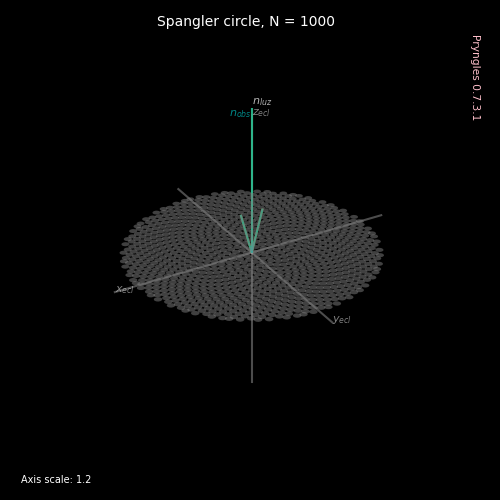

In [11]:
sg.plot3d()

or the two dimensional version:

<IPython.core.display.Javascript object>


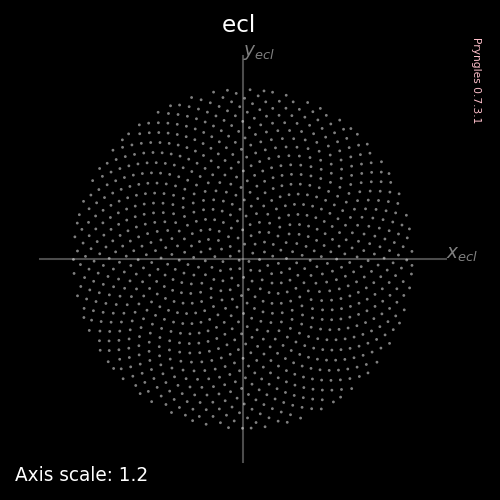

In [12]:
sg.plot2d(coords="ecl")

You may join several spanglers in a single one:

<IPython.core.display.Javascript object>


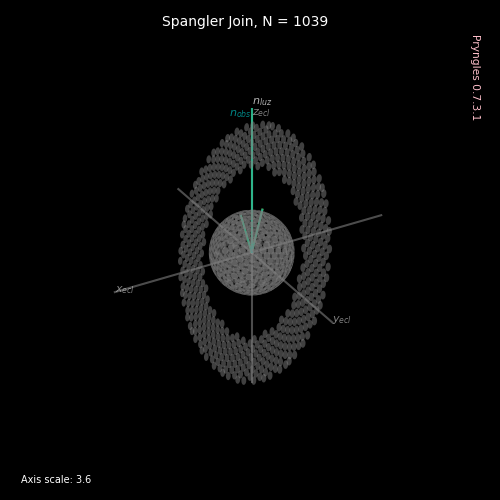

In [13]:
nspangles=500

sg1=Spangler(nspangles=nspangles)
sg1.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK)

sg2=Spangler(nspangles=nspangles,n_equ=Science.direction(0,20))
sg2.populate_spangler(shape="ring",scale=3,ri=2/3,spangle_type=SPANGLE_GRANULAR)

sgj=Spangler(spanglers=[sg1,sg2])
sgj.plot3d(coords="ecl")

Notice that we have defined the type of spangles to be used.  The type of spangles can be used to differentiate spangles according to their properties.  Type of spangles are:

In [14]:
[f"{spangle} = {eval(spangle)}" for spangle in Consts.get_all() if ('SPANGLE_' in spangle) and ('COLORS' not in spangle)]

['SPANGLE_ATMOSPHERIC = 2',
 'SPANGLE_GASEOUS = 5',
 'SPANGLE_GRANULAR = 4',
 'SPANGLE_LIQUID = 3',
 'SPANGLE_SOLID_ICE = 1',
 'SPANGLE_SOLID_ROCK = 0',
 'SPANGLE_STELLAR = 6']

In graphical representation, each type of spangle are of a different color.  Additionally, for computing the state of the spangle (visible, illuminated, transmitting) the following special spangles are considered:

In [15]:
SPANGLES_SEMITRANSPARENT

[4, 5]

You may transform the coordinates of the spangles to any arbitrary system using `set_intersect`:

In [16]:
output=sgj.set_intersect(nvec=[0,0,1],center=[2,0,0])

Here `center` is the position of the origin of the intersection system.  In this case, the distance to the intersection of each spangle is calculated:

In [17]:
sgj.data.d_int

0       2.188469
1       2.259458
2       2.295646
3       2.090230
4       2.385894
          ...   
1034    2.372850
1035    2.462771
1036    2.575251
1037    2.700339
1038    2.828427
Name: d_int, Length: 1039, dtype: float64

You may check how the points looks like:

<IPython.core.display.Javascript object>


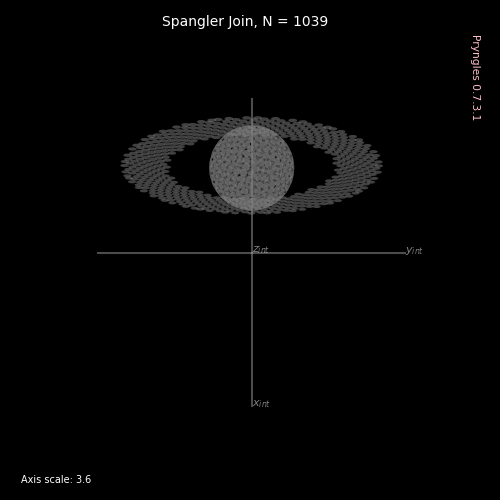

In [18]:
sgj.plot3d(coords="int")

You may plot the location seing from the +z-axis:

<IPython.core.display.Javascript object>


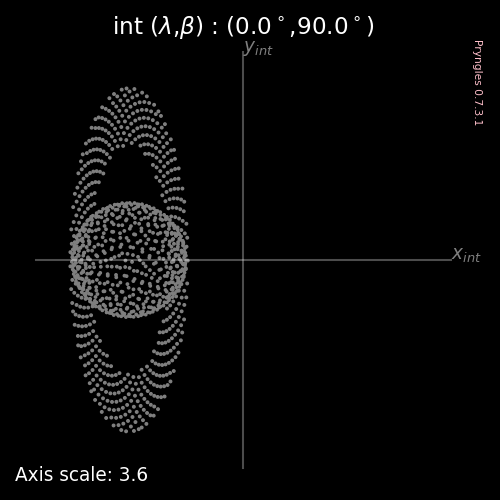

In [19]:
sgj.plot2d(coords="int")

When you calculate the coordinates of a `Spangler` in an *intersection* system, you may also calculate the convex hulls corresponding to the objects:

<IPython.core.display.Javascript object>


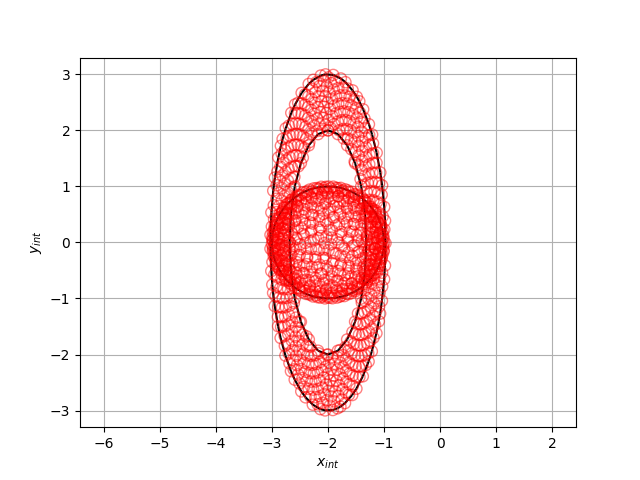

In [20]:
sgj._calc_qhulls()
sgj._plot_qhulls()

Here for instance the convex hull of the ring is blocking some of the spangles of the planet and viceversa.

There are two methods using the power of the intersection algorithms:

<IPython.core.display.Javascript object>


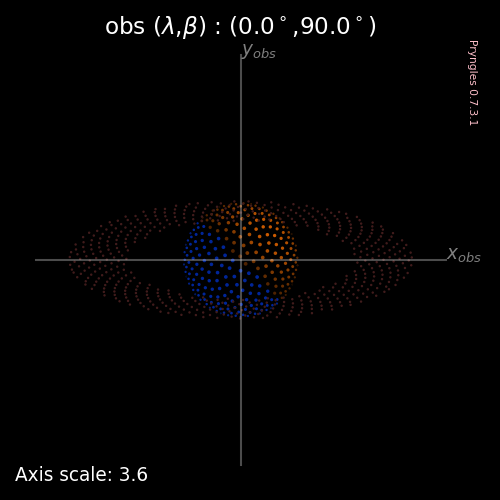

In [21]:
#Observer is in the direction of the z-axis
sgj.set_observer(nvec=Science.direction(0,90))
#Light source is over the x-y plane
sgj.set_luz(nvec=Science.direction(135,0))
sgj.plot2d(coords="obs")

You may see that the size and luminosity of the points in this representation are proportional to the angle between the direction of the light-source and the direction of the observer.  The rings are barely visible because they receive light by transmission.

The angles between the normal to the spangles and the direction of the observer and the source of light are in the following columns of the Spangler DataFrame:

In [22]:
sgj.data[["cos_obs","cos_luz"]]

,cos_obs,cos_luz
0,-0.99800,-0.061967
1,-0.99400,0.093664
2,-0.99000,-0.039862
3,-0.98600,-0.073302
4,-0.98200,0.175823
...,...,...
1034,0.34202,-0.664463
1035,0.34202,-0.664463
1036,0.34202,-0.664463
1037,0.34202,-0.664463


The state of the spangles can be checked in the following columns:

In [23]:
sgj.data[list(SPANGLER_SOURCE_STATES)+list(SPANGLER_VISIBILITY_STATES)]

,illuminated,transmit,transit,occult,visible,intersect,shadow,indirect,emit,above
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1034,False,False,False,False,False,False,False,False,False,False
1035,False,False,False,False,False,False,False,False,False,False
1036,False,False,False,False,False,False,False,False,False,False
1037,False,False,False,False,False,False,False,False,False,False


You may also check the states of the spangles using:

<IPython.core.display.Javascript object>


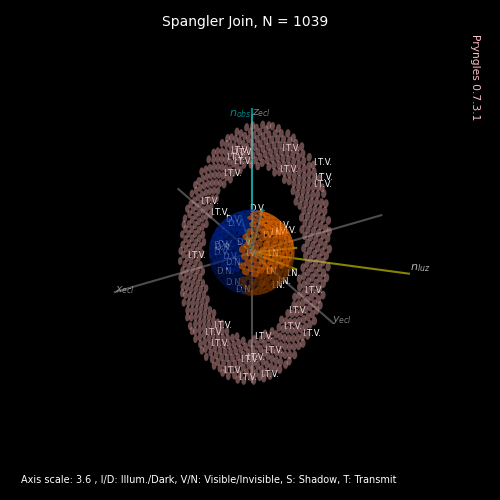

In [24]:
sgj.plot3d(coords="ecl",statemark=0.05)

You may illuminate independently two objects

<IPython.core.display.Javascript object>


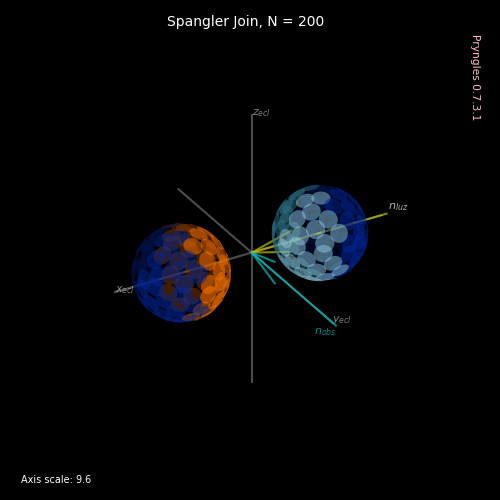

In [25]:
sg1=Spangler(sphash="Planet 1",nspangles=100,center_equ=[-5,0,0])
sg1.populate_spangler(shape="sphere",spangle_type=SPANGLE_LIQUID,preset=True,scale=3)

sg2=Spangler(sphash="Planet 2",nspangles=100,center_equ=[+5,0,0])
sg2.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,preset=True,scale=3)

sg=Spangler(spanglers=[sg1,sg2])

sg.set_observer([0,1,0])
sg.set_luz(nvec=[1,0,0],center=[0,0,0],sphash="Planet 1")
sg.set_luz(nvec=[-1,0,0],center=[0,0,0],sphash="Planet 2")

sg.plot3d()

The most interesting method if the `Spangler` module is that calculating the intersections between bodies.

<IPython.core.display.Javascript object>


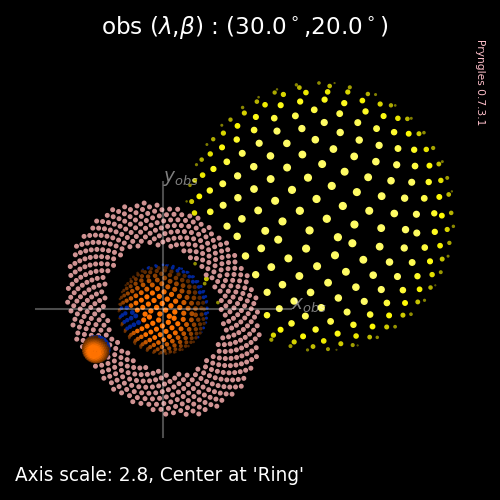

In [26]:
sps=[]
sg=Spangler(nspangles=nspangles,sphash="Parent",n_equ=[0,0,1],center_equ=[-7,0,0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_STELLAR,scale=3,seed=1,preset=1)
sps+=[sg]
sg=Spangler(nspangles=nspangles,sphash="Ring",n_equ=[1,0,0])
sg.populate_spangler(shape="ring",spangle_type=SPANGLE_GRANULAR,scale=2.5,seed=1,ri=1.5/2.5,boundary=0)
sps+=[sg]
sg=Spangler(nspangles=nspangles,sphash="Planet",n_equ=[0,0,1])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_SOLID_ROCK,scale=1,seed=1,preset=True)
sps+=[sg]
sg=Spangler(nspangles=nspangles,sphash="Moon",n_equ=[0,0,1],center_equ=[+3.0,0.0,0.0])
sg.populate_spangler(shape="sphere",spangle_type=SPANGLE_ATMOSPHERIC,scale=0.3,seed=1,preset=True)
sps+=[sg]

sg=Spangler(spanglers=sps)

sg.set_luz(nvec=sci.direction(10,0))
sg.update_illumination_state()

sg.set_observer(nvec=sci.direction(30,20))
sg.update_visibility_state()

sg.plot2d(center_at="Ring")

You may notice that the spangles that are not visible, does not appear in this plot.  Additionally the spangles which are not illuminated appears in a dark color.

When you check the spangles in 3d you may also notice the different states:

<IPython.core.display.Javascript object>


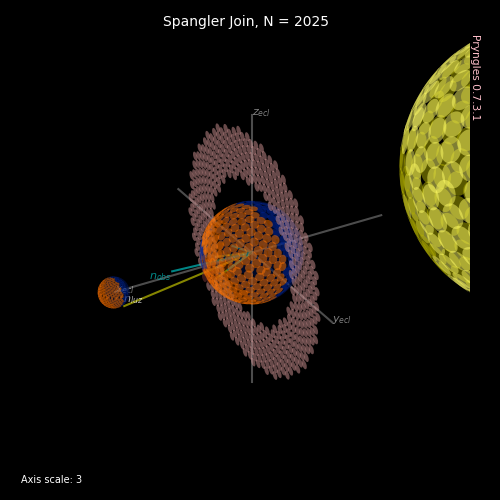

In [27]:
sg.plot3d(center_at="Ring")

You may even interact with the system:

In [28]:
sg._interact_plot2d()

interactive(children=(FloatSlider(value=70.0, continuous_update=False, description='lon_luz', max=360.0, reado…

--- 
*The authors*, Last update: september, 2022.